In [50]:
import gensim
import csv
import pandas as pd
import seaborn as sns
from collections import Counter
import os

# Introduction

In this notebook we will look at the models trained on the NSF and UKRI data. These fits were done over a number of topics and are intended to be used on the whole dataset (including NIH). NIH was ommited because its relative size (i.e. number of grants) means that any model trained on that data will identify almost exclusively medical topics. 

Count how many rows in the tokenized titles and abstracts. 

In [3]:
with open("../clean-data/fine-scale/training-data/titles-abstracts-tokenized.csv") as f:
    n = sum(1 for line in f)
    
print(n)

495110


Load dictionary and corpus, these were made using a bigram model made with the NSF, NIH and UKRI data. The corpus and dictionary also excluded documents with less than 20 tokens.

In [4]:
dictionary = gensim.corpora.Dictionary.load('../clean-data/fine-scale/training-data/dictionary.dict')
corpus = gensim.corpora.MmCorpus('../clean-data/fine-scale/training-data/corpus.mm')

In [5]:
len(dictionary)

6239

In [6]:
len(corpus)

381908

## Coherence

We can evaluate the performance of the models of differing topic sizes by looking at the u-mass coherence score. This metric effectively measures the degree to which the words in the topics identified actually tend to occur together in documents across the corpus. 

In [7]:
coherence_scores = pd.read_csv('../results/fine-scale/coherence-scores/training-data/calculated_coherence.csv')

In [42]:
coherence_scores.sort_values('umass', ascending=False)

,Unnamed: 0,Topics,umass
13,13,50,-2.516706
36,36,75,-2.976225
11,11,146,-4.251177
29,29,142,-4.465684
1,1,144,-4.481466
37,37,108,-4.494314
22,22,140,-4.613671
6,6,100,-4.717815
40,40,138,-4.779871
35,35,104,-4.844444


<AxesSubplot:xlabel='Topics', ylabel='umass'>

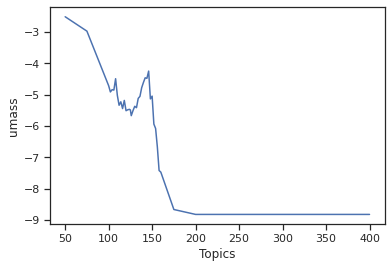

In [8]:
sns.set_theme(style="ticks")

sns.lineplot(x="Topics", y="umass", data =coherence_scores)

In [95]:
lda = gensim.models.ldamulticore.LdaMulticore.load('./results/fine-scale/lda-models/training-model/model_130_topics')

In [84]:
output_array = []
for j in range(lda.num_topics):
    topic_list = [str(i[0]) for i in lda.get_topic_terms(j)]
    topic_list.sort()
    output_array.append("".join(topic_list))

In [85]:
max(Counter(output_array).values())

44

In [87]:
topics_range = range(100, 161, 2)
# for n in topics_range:
#   print(n)
os.chdir('/home/flavia/Projects/Funding-Landscape/')

In [88]:
rep_topics = []


for K in topics_range:

    file = "./results/fine-scale/lda-models/training-model/model_" + str(K) + "_topics"
    lda = gensim.models.ldamulticore.LdaMulticore.load(file)

    K = lda.num_topics
    w_ids = []
    for t in range(K):
        x = lda.get_topic_terms(t)
        w_ids.append([j[0] for j in x])
        w_ids[t].sort()
        w_ids[t] = "".join([str(w) for w in w_ids[t]])

    rep_topics.append(max(Counter(w_ids).values()))

In [89]:
df = pd.read_csv("./results/fine-scale/lda-models/training-model/fitting_time_lda.csv")

In [90]:
df["n_topics"] = pd.to_numeric(df["n_topics"])

In [91]:
df_filtered = df[df.n_topics > 99]
df_filtered = df_filtered[df_filtered.n_topics < 161]
df_filtered = df_filtered[df_filtered.n_topics != 125]
df_filtered = df_filtered.drop_duplicates(subset=['n_topics'])

print(df_filtered)
len(df_filtered)

    n_topics            fitting_time
2        100  0 days 00:05:48.143793
4        150  0 days 00:05:49.613167
16       102  0 days 00:05:13.027843
17       104  0 days 00:05:13.612920
18       106  0 days 00:05:14.135895
19       108  0 days 00:05:17.238912
20       110  0 days 00:05:31.528255
21       112  0 days 00:05:15.842809
22       114  0 days 00:05:23.112278
23       116  0 days 00:05:23.011810
24       118  0 days 00:05:30.961302
25       120  0 days 00:05:37.270091
26       122  0 days 00:05:29.298163
27       124  0 days 00:05:35.353275
28       126  0 days 00:05:31.556321
29       128  0 days 00:05:38.091935
30       130  0 days 00:05:30.538868
31       132  0 days 00:05:32.016785
32       134  0 days 00:05:43.077002
33       136  0 days 00:05:44.389846
34       138  0 days 00:05:41.981855
35       140  0 days 00:05:48.092468
36       142  0 days 00:05:47.082135
37       144  0 days 00:05:50.173260
38       146  0 days 00:05:47.049967
39       148  0 days 00:05:52.233360
4

31

<AxesSubplot:xlabel='n_topics', ylabel='prop_rep'>

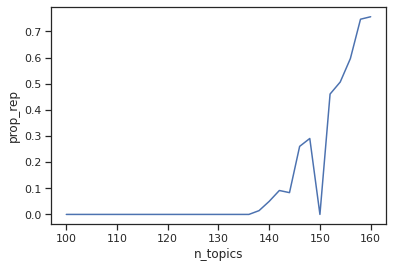

In [92]:
df_filtered["rep_topics"] = [x for x in map(lambda x: x-1, rep_topics)]
df_filtered["prop_rep"] = df_filtered["rep_topics"] / df["n_topics"] 

sns.lineplot(data=df_filtered, x="n_topics", y="prop_rep")

In [96]:
topic_words = [[j[0] for j in lda.show_topic(i,topn = 10)] for i in range(lda.num_topics)]

topic_df = pd.DataFrame(topic_words)

print(topic_df.to_string())

                     0                  1                 2                      3                     4                    5                    6                     7                            8                    9
0                  ray           detector             gamma                neutron           chloroplast                burst             proposer                 algae               authentication               merger
1             matching           embedded  wave_propagation          decentralized               riemann               system                motif             networked                         mask         neurobiology
2              quantum           material          electron          semiconductor              property               matter               device                physic                         spin               charge
3             manifold           geometry          topology                  space             curvature               theor